    T   I
0  53  11
1  57   4
2  58   4
3  63   2
4  66   0
95% posterior interval for the slope:  -0.3754138456984354
95% posterior interval for the slope:  -0.1113321860475964
the challenger launch was at 31 degrees Fahrenheit 10.820515873015879
ci 95% lower:  4.048268994019225
ci 95% upper:  17.592762752012533
post prob damage index >0:  0.9983813000680687


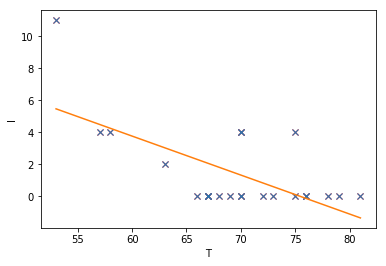

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
oring = pd.read_csv("Challenger2.txt",sep="\t")
print(oring.head())
ax=oring.plot(x="T",y="I",legend=False,style="rx")
ax.set(ylabel="I")

x=oring["T"].values
y=oring["I"].values


# posterior prediction interval at 31 degrees

import statsmodels.api as sm
x1=sm.add_constant(x)
model = sm.OLS(y, x1)
results = model.fit()

slope=results.params[1]
intercept=results.params[0]
std_err=results.bse[1]

# 95% posterior interval for the slope
print("95% posterior interval for the slope: ",slope-std_err*t.ppf(0.975,21))
print("95% posterior interval for the slope: ",slope+std_err*t.ppf(0.975,21))

# the challenger launch was at 31 degrees Fahrenheit
print("the challenger launch was at 31 degrees Fahrenheit",slope*31+intercept)

ser=np.sqrt(np.sum(results.resid**2)/21)
likelihood = results.params[0]+results.params[1]*31


# posterior prediction interval for T=31


print("ci 95% lower: ",likelihood-ser*t.ppf(0.975,21)*np.sqrt(1+(1/23)+((31-np.mean(x))**2)/22/np.var(x,ddof=1)))
print("ci 95% upper: ",likelihood+ser*t.ppf(0.975,21)*np.sqrt(1+(1/23)+((31-np.mean(x))**2)/22/np.var(x,ddof=1)))

# posterior probability that damage index is greater than zero
print("post prob damage index >0: ",1-t.cdf((0-10.82052)/(2.102*np.sqrt(1+1/23+((31-np.mean(x))**2/22/np.var(x,ddof=1)))),21))
plt.plot(x,y,'x')
plt.plot(x,results.fittedvalues)
plt.show()